In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
N =3000
t = np.arange(0,N)

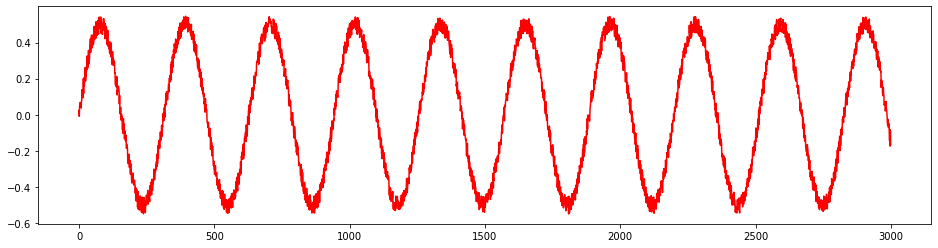

In [3]:
data_sine = np.sin(0.02*t)/2 + np.random.uniform(-0.05,0.05,N)
plt.figure(figsize=(16,4))
plt.plot(data_sine,c='red')
plt.show()

In [26]:
def convertSignalToDataset(signal,step):
  X = []
  Y = []
  for i in range(len(signal)-step):
    j=i + step
    X.append(signal[i:j])
    Y.append(signal[j])
  return np.array(X),np.array(Y)

In [27]:
X_train,Y_train = convertSignalToDataset(data_sine[:2000],step = 20)
X_test,Y_test = convertSignalToDataset(data_sine[2000:],step = 20)

In [28]:
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [29]:
X_test.shape

(980, 20, 1)

In [30]:
model = tf.keras.models.Sequential([
                                    layers.SimpleRNN(units=64, input_shape=(None,1)),
                                    layers.Dense(1)
])

In [37]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.keras.losses.MSE)

In [39]:
model.fit(X_train,Y_train,epochs=20,batch_size=16)

Epoch 1/20
124/124 [==============================] - 3s 21ms/step - loss: 0.0012
Epoch 2/20
124/124 [==============================] - 3s 21ms/step - loss: 0.0012
Epoch 3/20
124/124 [==============================] - 3s 21ms/step - loss: 0.0012
Epoch 4/20
124/124 [==============================] - 3s 23ms/step - loss: 0.0012
Epoch 5/20
124/124 [==============================] - 3s 24ms/step - loss: 0.0011
Epoch 6/20
124/124 [==============================] - 3s 21ms/step - loss: 0.0012
Epoch 7/20
124/124 [==============================] - 3s 21ms/step - loss: 0.0012
Epoch 8/20
124/124 [==============================] - 3s 22ms/step - loss: 0.0011
Epoch 9/20
124/124 [==============================] - 3s 22ms/step - loss: 0.0012
Epoch 10/20
124/124 [==============================] - 3s 22ms/step - loss: 0.0012
Epoch 11/20
124/124 [==============================] - 3s 22ms/step - loss: 0.0011
Epoch 12/20
124/124 [==============================] - 3s 22ms/step - loss: 0.0012
Epoch 13/20
1

In [40]:
model.evaluate(X_test,Y_test)

31/31 [==============================] - 0s 5ms/step - loss: 0.0011


0.0010699816048145294

In [41]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [42]:
# shift test data to the front
len_test_pred = len(train_pred) + len(test_pred)
temp_test_pred = np.empty((len_test_pred,1))
temp_test_pred[0:len(train_pred)] = train_pred
temp_test_pred[len(train_pred):len_test_pred] = test_pred

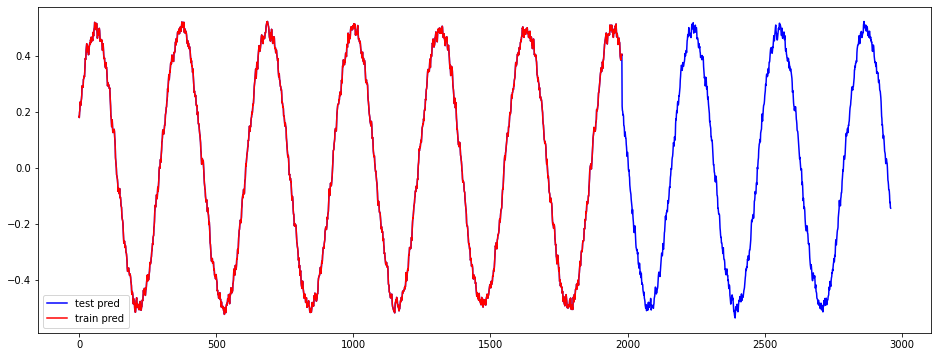

In [43]:
plt.figure(figsize=(16, 6))
plt.plot(temp_test_pred, color='blue', label='test pred')
plt.plot(train_pred, color='r', label='train pred')
plt.legend()